# Model Training Sensitivity Tests

In [1]:
import os
import DataProcess
import MLP_Model
#Set working directories
cwd = os.getcwd()
os.chdir("..")
os.chdir("..")
datapath = os.getcwd()  

2023-10-25 22:27:38.997090: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-25 22:27:38.997121: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#Define hold out year
HOY = 2019
#Run data processing script to partition key regional dataframes
#note, need to load RegionTrain_SCA.h5,
RegionTrain, RegionTest, RegionObs_Train, RegionObs_Test, RegionTest_notScaled = DataProcess.DataProcess(HOY, datapath, cwd)

Processing training dataframes for each region
N_Sierras
S_Sierras_Low
S_Sierras_High


**Ideas:**

We can look at the "shuffle" option in MLP_Model.py (T/F)

the number of epochs hereTwo different options for training. Can add "batch_size" variable to Model_train function and test model performance here. Also change size of LDs, number of layers. (training > SSM_Hindcast > Hindcast_eval)

In [3]:
#model training, each participants model will be different but should follow the prescribed input feature template
epochs= 30
batch_size = 200
node_list = [500] # originally we used [128, 128, 64, 64, 32, 16]
MLP_Model.Model_train(cwd, epochs, batch_size, RegionTrain, RegionTest, RegionObs_Train, RegionObs_Test)

Training model for:  N_Sierras
All previous files deleted successfully.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 105)]             0         
                                                                 
 dense (Dense)               (None, 128)               13568     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                       

2023-10-25 22:28:09.345807: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-10-25 22:28:09.345836: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-10-25 22:28:09.345854: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-spestana): /proc/driver/nvidia/version does not exist
2023-10-25 22:28:09.346042: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Training model for:  S_Sierras_Low
All previous files deleted successfully.
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_7 (Dense)             (None, 128)               896       
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                 

In [4]:
#Need to create Predictions folder if running for the first time
Predictions = MLP_Model.Model_predict(cwd,  RegionTest, RegionObs_Test, RegionTest_notScaled)

18/18 [==============================] - 0s 755us/step


Preliminary Model Analysis for:  N_Sierras
 R2 is  0.8339304817425933
 RMSE is  14.844785930391122
 R2 fSCA is  0.8222404140555054
 RMSE fSCA is  15.35838291804682


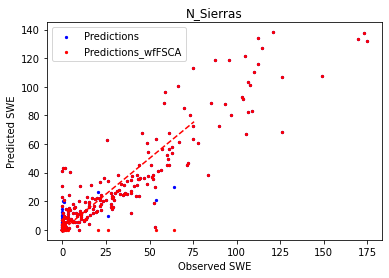

Preliminary Model Analysis for:  S_Sierras_Low
 R2 is  0.9367955464578187
 RMSE is  6.343624351110112
 R2 fSCA is  0.838824776256781
 RMSE fSCA is  10.13007726896698


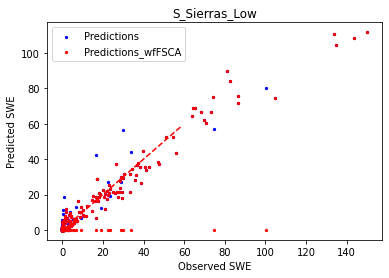

Preliminary Model Analysis for:  S_Sierras_High
 R2 is  0.8139150247669649
 RMSE is  20.235919466960258
 R2 fSCA is  0.8093672799712877
 RMSE fSCA is  20.481700450164062


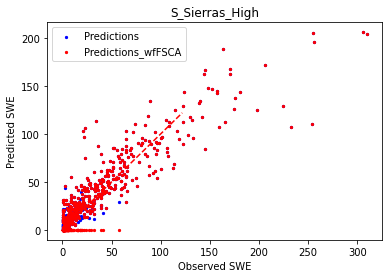

,Region,R2,RMSE,R2_fSCA,RMSE_fSCA
0,N_Sierras,0.83,14.84,0.82,15.36
1,S_Sierras_Low,0.94,6.34,0.84,10.13
2,S_Sierras_High,0.81,20.24,0.81,20.48


In [5]:
Performance = MLP_Model.Prelim_Eval(cwd, Predictions)
Performance